# Zadanie 1
 

1. Bład względny jest tak duży, ze względu na dużą różnice pomiedzy akumulatorem, a dodawaną liczbą, co skutkuje brakiem precyzji w wykonaniu tej operacji. Brak precyzji występuje na ostnich bitach liczby mniejszej.

2. Błąd rosnąć bedzie liniowo wzgledem wielkości akumulatora. Będzie się tak dziać, ponieważ przy wzroście akumulatora o 1 bit, tracimy ostatni bit, co będzie wpływało na dokładność obliczeń. 

3. Lista zawierająca naprzemiennie małe i duże liczby będzie niedokładnie ewaluowana za pomocą rozwiązania rekurencyjnego już na poziomie pierwszego dodawania. Każda tablica, gdzie występować będzie sumowanie małej liczby z duża, charatkeryzować będzie się niezerowym błedem. np połowa tablicy liczby duże a druga połowa małe.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from time import time

N = 10 ** 7

val = np.float32((random.random() * 0.8) + 0.1)
val = np.float32(0.53125)

array = [val for _ in range(N)]

S = np.float32(0)

for x in array:
    S += x

print("Array size: ", N)
print("Value: ", val)
print("Real value: ", N * val)
print("Summation value:", S)

print()
print('Absolute error: ', abs(S - N*val))
print('Approximation error: ', abs(S - N*val) / S)

Array size:  10000000
Value:  0.53125
Real value:  5312500.0
Summation value: 5030840.5

Absolute error:  281659.5
Approximation error:  0.05598656924225683


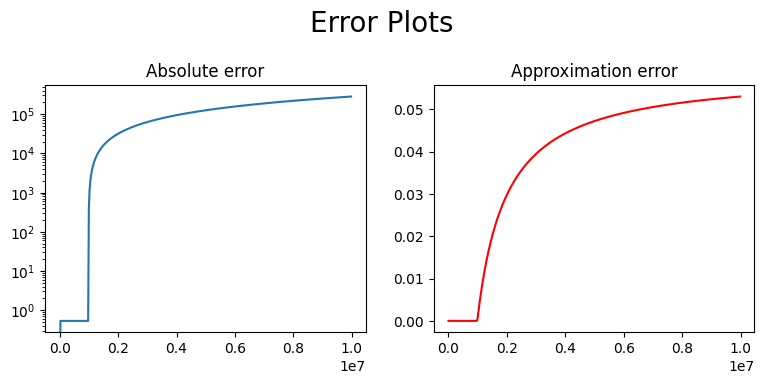

In [3]:
step = 25000

S1 = np.float32(0)
reportX = [i for i in range(0, N, step)]
reportAbsoluteError = [0 for i in range(0, N, step)]
reportApproximationError = [0 for i in range(0, N, step)]

for i, x in enumerate(array):
    S1 += x

    if i % step == 0 and i != 0:
        absError = abs(S1 - i*val)
        appError = absError / (i*val)

        reportAbsoluteError[i // step] = absError
        reportApproximationError[i // step] = appError

matplotlib.rcParams['figure.figsize'] = [8, 4]
figure, axis = plt.subplots(1, 2)

axis[0].set_yscale('log')

axis[0].plot(reportX, reportAbsoluteError)
axis[1].plot(reportX, reportApproximationError, 'r')

figure.suptitle('Error Plots', fontsize=20)
figure.tight_layout(pad=2)
axis[0].set_title("Absolute error")
axis[1].set_title("Approximation error")

plt.show()


In [4]:
def recurAdd(array, i, j):
    if j < i:
        return np.float32(0)

    if i + 1 == j:
        return array[i] + array[j]
    
    if i == j:
        return array[i]
    
    return recurAdd(array, i, (i + j) // 2) +  recurAdd(array, (i + j) // 2 + 1, j)

recurStart = time()
recurVal = recurAdd(array, 0, N - 1)
recurTime = time() -  recurStart

S2 = np.float32(0)
linearStart = time()
for x in array:
    S2 += x
linearTime = time() - linearStart

print("Array size: ", N)
print("Value: ", val)
print("Real value: ", N * val)
print("Summation value:", recurVal)

print()
print('Absolute error: ', abs(recurVal - N*val))
print('Approximation error: ', abs(recurVal - N*val) / S)

print()
print("BENCHMARK")
print("Recursive: ", recurTime, "s.")
print("Linear: ", linearTime, "s.")


recurBig = np.float32(99999)
recurSmall = np.float32(0.023456)

recurWrongArray = [recurBig if i % 2 == 0 else recurSmall for i in range(N)]
recurWrongVal = recurAdd(recurWrongArray, 0, N - 1)
recurRightVal = N // 2 * (recurBig + recurSmall)

print()
print("For [small, big, small, big, ... ] recursive returns wrong values")
print("Correct val:", recurRightVal)
print("Recur val:", recurWrongVal)


Array size:  10000000
Value:  0.53125
Real value:  5312500.0
Summation value: 5312500.0

Absolute error:  0.0
Approximation error:  0.0

BENCHMARK
Recursive:  2.6713387966156006 s.
Linear:  0.8642511367797852 s.

For [small, big, small, big, ... ] recursive returns wrong values
Correct val: 499995117187.5
Recur val: 499995150000.0


# Zadanie 2

1. W algorytmie Kahana używamy zmiennej err, aby kompensowac niedokładności kolejnych sum zmiennoprzecinkowych.

In [5]:
def Kahan(arr):
    sum = np.float32(0)
    err = np.float32(0)
    for x in arr:
        y = x - err
        temp = sum + y
        err = (temp - sum) - y
        sum = temp
    
    return sum

kahanStart = time() 
khanSum = Kahan(array)
kahanTime = time() - kahanStart

print("Array size: ", N)
print("Value: ", val)
print("Real value: ", N * val)
print("Kahan summation value:", khanSum)

print()
print('Kahan absolute error: ', abs(khanSum - N*val))
print('Kahan approximation error: ', abs(khanSum - N*val) / S)

print()
print("BENCHMARK")
print("Recursive: ", recurTime, "s.")
print("Kahan: ", kahanTime, "s.")

Array size:  10000000
Value:  0.53125
Real value:  5312500.0
Kahan summation value: 5312500.0

Kahan absolute error:  0.0
Kahan approximation error:  0.0

BENCHMARK
Recursive:  2.6713387966156006 s.
Kahan:  2.75571870803833 s.


# Zadanie 3

1. Zauważmy, że oba te ciagi są bezwzglednie malejące. Jeżeli zaczniemy sumowanie od tyłu, to zaczynając od liczb najmniejszych, powinnśmy otrzymać lepszą precyzje obliczeń. Wiekszą precyzje uzyskamy także stosując liczby typu double.

In [6]:
def seriesGen(s, dataType, iterator, dirichlet):
    S = dataType(0)
    for i in iterator:
        v = dataType(1) / np.power(dataType(i), dataType(s))
        if dirichlet and i % 2 == 0:
            v *= -1
        S += v

    return S

arrayS = [2, 3.6667, 5, 7.2, 10]
arrayN = [50, 100, 200, 500, 1000]
dataType = [(np.float32, "FLOAT"), (np.double, "DOUBLE")]
methodType = [(False, "Dzeta"), (True, "Dirichlet")]
directionType = [(False, "forward"), (True, "backward")]

for data in dataType:
    for method in methodType:
        for n in arrayN:
            for s in arrayS:
                for direction in directionType:

                    iterator = range(1, n+1)
                    if direction[0]:
                        iterator = range(n, 0, -1)

                    print(f"{data[1]:<6}: Sum for {direction[1]:>8} {method[1]:>9}, N = {n:>5}, s = {s:>7}, SUM = {seriesGen(s, data[0], iterator, method[0]):<19}")



FLOAT : Sum for  forward     Dzeta, N =    50, s =       2, SUM = 1.6251329183578491 
FLOAT : Sum for backward     Dzeta, N =    50, s =       2, SUM = 1.62513267993927   
FLOAT : Sum for  forward     Dzeta, N =    50, s =  3.6667, SUM = 1.109399437904358  
FLOAT : Sum for backward     Dzeta, N =    50, s =  3.6667, SUM = 1.1093997955322266 
FLOAT : Sum for  forward     Dzeta, N =    50, s =       5, SUM = 1.0369274616241455 
FLOAT : Sum for backward     Dzeta, N =    50, s =       5, SUM = 1.0369277000427246 
FLOAT : Sum for  forward     Dzeta, N =    50, s =     7.2, SUM = 1.0072276592254639 
FLOAT : Sum for backward     Dzeta, N =    50, s =     7.2, SUM = 1.0072276592254639 
FLOAT : Sum for  forward     Dzeta, N =    50, s =      10, SUM = 1.0009945631027222 
FLOAT : Sum for backward     Dzeta, N =    50, s =      10, SUM = 1.0009945631027222 
FLOAT : Sum for  forward     Dzeta, N =   100, s =       2, SUM = 1.634984016418457  
FLOAT : Sum for backward     Dzeta, N =   100, s =    

# Zadanie 4

W tym zadaniu skorzystałem z szybkich operacji na dużych tablicach z wykorzystaniem numpy, aby zwizaulizować zachowanie punktów 100 000 punktów po 1000 iteracjach przekrztałceniem x_n+1 = rx_n(1-x_n). Na ostatnim wykresie przedstawiłem zachowanie 50 równo odległych punktów w zależności od iteracji. Jeżeli dany punkt znalazł się blisko zera na odległość < 0.001 to uznawany był za równy 0 i nie podlegał dalszym iteracją. Piersza wizualizacja na ostatniej figurze jest bardziej czytelna dla większej toleracji - wtedy wartości szybciej zbiegają do 0, co skutkuje zwiększeniem czytelności.  

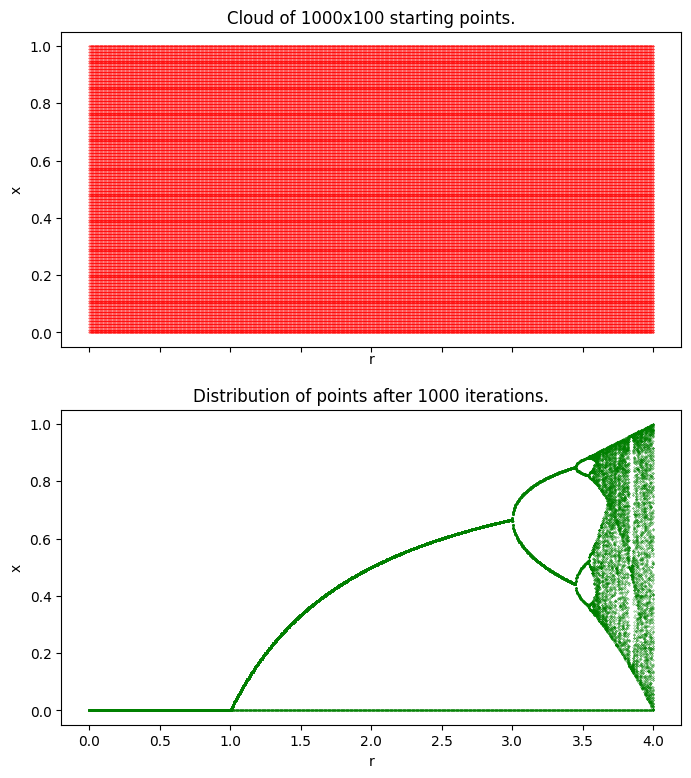

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)
widthRes = 1000
heightRes = 100
iterations = 1000

arrayX = np.array([x for x in np.linspace(0, 1, heightRes) for _ in range(widthRes)])
arrayR = np.array([r for _ in range(heightRes) for r in np.linspace(0, 4, widthRes)])

# generate points on a plane
ax1.set_title(f"Cloud of {widthRes}x{heightRes} starting points.")
ax1.set_ylabel("x")
ax1.set_xlabel("r")

ax2.set_title(f"Distribution of points after {iterations} iterations.")
ax2.set_ylabel("x")
ax2.set_xlabel("r")

ax1.scatter(arrayR, arrayX, s = 0.1, color="r")

for i in range(iterations):
    arrayX = arrayR * arrayX * (np.ones(widthRes*heightRes) - arrayX)

ax2.scatter(arrayR, arrayX, s = 0.05, color="g")

plt.show()

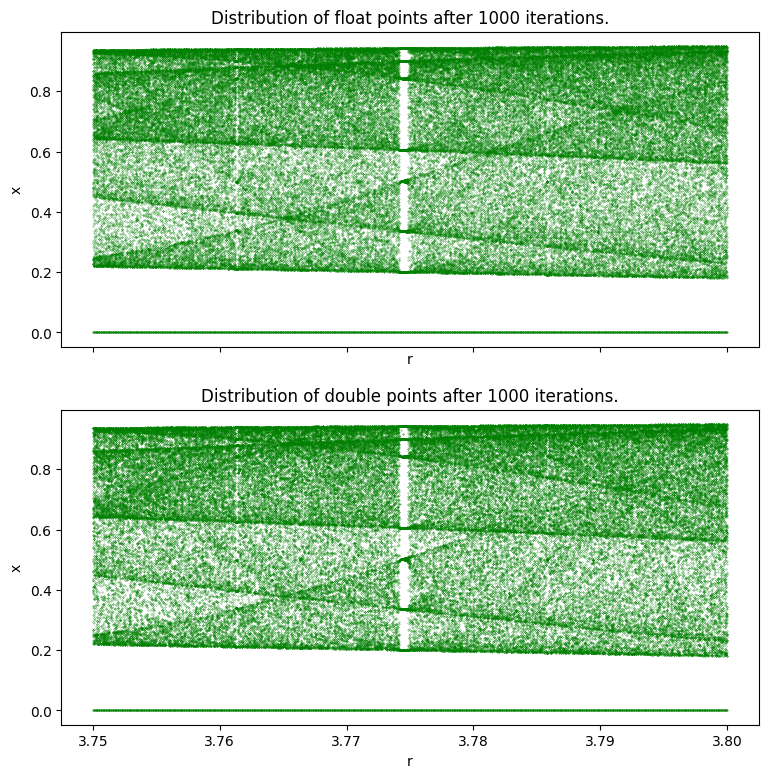

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9), sharex=True)
arrayX2 = np.array([x for x in np.linspace(0, 1, heightRes) for _ in range(widthRes)])
arrayR2 = np.array([r for _ in range(heightRes) for r in np.linspace(3.75, 3.8, widthRes)])

arrayXDouble = np.double(arrayX2)
arrayXFloat = np.float32(arrayX2)

arrayRDouble = np.double(arrayR2)
arrayRFloat = np.float32(arrayR2)

ax1.set_title(f"Distribution of float points after {iterations} iterations.")
ax1.set_ylabel("x")
ax1.set_xlabel("r")

ax2.set_title(f"Distribution of double points after {iterations} iterations.")
ax2.set_ylabel("x")
ax2.set_xlabel("r")

for i in range(iterations):
    arrayXDouble = arrayRDouble * arrayXDouble * (np.double(np.ones(widthRes*heightRes)) - arrayXDouble)
    arrayXFloat = arrayRFloat * arrayXFloat * (np.double(np.ones(widthRes*heightRes)) - arrayXFloat)

ax1.scatter(arrayRFloat, arrayXFloat, s = 0.05, color="g")
ax2.scatter(arrayRDouble, arrayXDouble, s = 0.05, color="g")

plt.show()

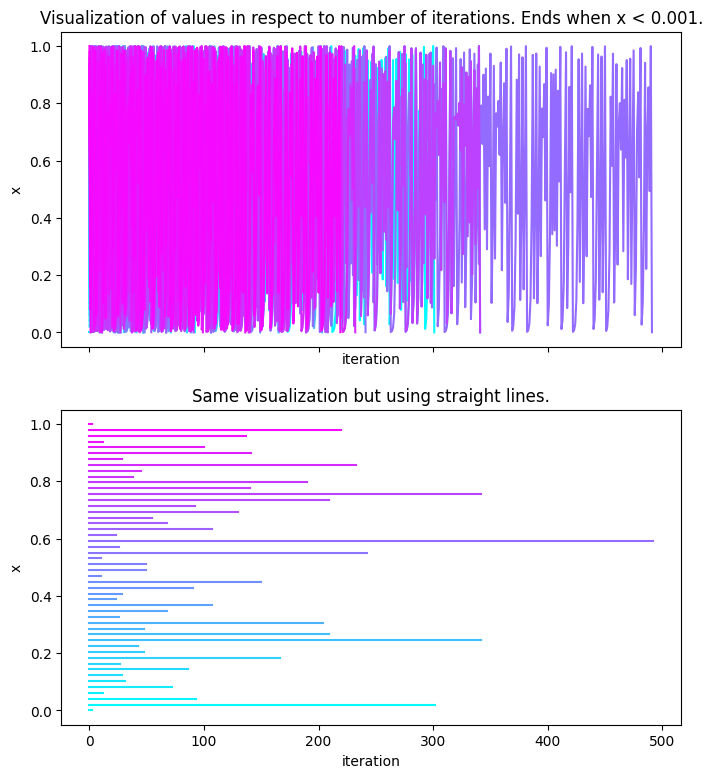

In [9]:
iterations2 = 1000
heightRes2 = 50
tolerance = 0.001

idxArr = [i for i in range(iterations2 + 1)]
xArr = [0 for i in range(iterations2 + 1)]
w = 0

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)

ax1.set_title(f"Visualization of values in respect to number of iterations. Ends when x < {tolerance}.")
ax1.set_ylabel("x")
ax1.set_xlabel("iteration")

ax2.set_title(f"Same visualization but using straight lines.")
ax2.set_ylabel("x")
ax2.set_xlabel("iteration")

for intensivity, x in enumerate(np.float32(np.linspace(0, 1, heightRes2))):
    for i in range(iterations2):
        xArr[i] = x
        x = 4*x*(1 - x)
        w = i
        if abs(x) < tolerance:
            break

    xArr[w + 1] = x
    ax1.plot(idxArr[:w+2], xArr[:w+2], color=(intensivity/heightRes2, 1 - intensivity/heightRes2, 1))
    ax2.plot([0, w+2], [xArr[0], xArr[0]], color=(intensivity/heightRes2, 1 - intensivity/heightRes2, 1))

plt.show()